<a href="https://colab.research.google.com/github/inyunita/RockPaperScissors_ImageClassification_CNN/blob/main/Rock_Paper_Scissor_Image_Classification_ML_Pemula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Submission Dicoding Belajar Machine Learning untuk Pemula**
## **Rock Paper Scissor Image Classification**


---


* **Nama: Indah Yunita**

* **Email Dicoding: iyunita9279@gmail.com**

* **Asal: Madiun, Jawa Timur**

### **1. Dataset**

**Kaggle Credential Dataset Rock Paper Scissor**

In [ ]:
_ = ! git clone https://github.com/inyunita/kaggle_credential_indah # get credential from kaggle
_ = ! pip install kaggle # install kaggle on drevice
_ = ! mkdir ~/.kaggle # make hidden folder .kaggle to configure credential
_ = ! cp kaggle_credential_indah/kaggle.json ~/.kaggle/ # copy credential from github to .kaggle folder
_ = ! chmod 600 ~/.kaggle/kaggle.json # change access
_ = ! kaggle datasets download rockpaperscissor # which dataset to download
_ = ! unzip rockpaperscissor  # unzip if data zipped

**Jumlah Data Pada Setiap Label**

In [ ]:
import os
#Direktori Data
all_dir = "/content/rockpaperscissors/"
rock_dir = all_dir + "rock"
paper_dir = all_dir + "paper"
scissors_dir = all_dir + "scissors"

#Jumlah data masing-masing kelas
print('Jumlah data rock :',len(os.listdir(rock_dir)))
print('Jumlah data paper :',len(os.listdir(paper_dir)))
print('Jumlah data scissor :',len(os.listdir(scissors_dir)))

Jumlah data rock : 726
Jumlah data paper : 712
Jumlah data scissor : 750


### **2. Preprocessing**

In [ ]:
#Library Tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

**Inisialisasi Ukuran Citra dan Channel**

In [ ]:
width = 150
height = 150
channel= 3

**Melihat Kelas Pada Dataset**

In [ ]:
rps_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  all_dir,
  image_size=(width, height)
  )

class_names = rps_dataset.class_names
print(class_names)

Found 2188 files belonging to 3 classes.
['paper', 'rock', 'scissors']


**Menampilkan Sample Citra**

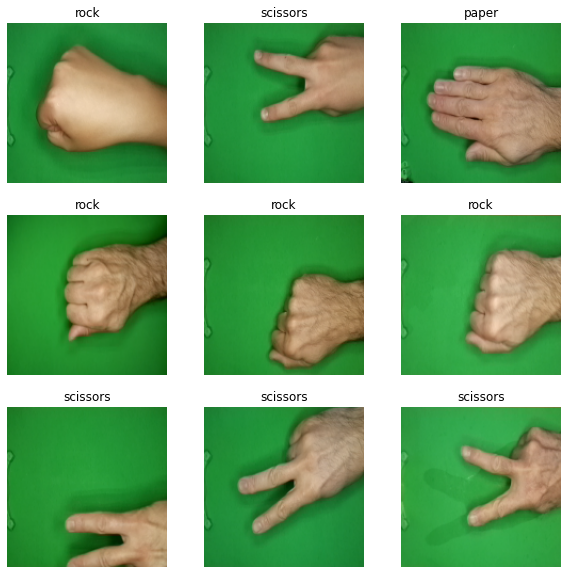

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in rps_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Augmentasi Citra dan Pembagian Data Train dan Validation**

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 20,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode = 'nearest',
                                   validation_split=0.4 #Split 40% untuk Data validasi
                                   )

In [ ]:
train_generator = datagen.flow_from_directory(all_dir,
                                              target_size=(width,height),
                                              batch_size=10,
                                              class_mode='categorical',
                                              subset='training')

validation_generator = datagen.flow_from_directory(all_dir,
                                              target_size=(width,height),
                                              batch_size=10,
                                              class_mode='categorical',
                                              subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


### **3. Membangun Model**

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(width,height,channel)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3,activation= tf.nn.softmax)) #output ada 3 kelas

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

**Compile Optimizer dan Loss Function**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

**Callback**

In [ ]:
class CallbackAcc(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.96):
            print("Akurasi Telah Mencapai %2.2f%% " %(logs.get('accuracy')*100))
            self.model.stop_training = True
callback = CallbackAcc()

### **6. Training Model**

In [ ]:
history = model.fit(train_generator, 
                    epochs=50,
                    validation_data=validation_generator,
                    verbose=1,
                    callbacks=[callback],
                    shuffle = True)

Epoch 1/50
132/132 [==============================] - 28s 122ms/step - loss: 1.6048 - accuracy: 0.4749 - val_loss: 0.9408 - val_accuracy: 0.6270
Epoch 2/50
132/132 [==============================] - 16s 120ms/step - loss: 0.6710 - accuracy: 0.7298 - val_loss: 0.4510 - val_accuracy: 0.8719
Epoch 3/50
132/132 [==============================] - 16s 121ms/step - loss: 0.4464 - accuracy: 0.8242 - val_loss: 0.3729 - val_accuracy: 0.8890
Epoch 4/50
132/132 [==============================] - 16s 119ms/step - loss: 0.3810 - accuracy: 0.8638 - val_loss: 0.3143 - val_accuracy: 0.8913
Epoch 5/50
132/132 [==============================] - 16s 120ms/step - loss: 0.3426 - accuracy: 0.8721 - val_loss: 0.2594 - val_accuracy: 0.9142
Epoch 6/50
132/132 [==============================] - 16s 120ms/step - loss: 0.3253 - accuracy: 0.8896 - val_loss: 0.2940 - val_accuracy: 0.9027
Epoch 7/50
132/132 [==============================] - 17s 126ms/step - loss: 0.2802 - accuracy: 0.8942 - val_loss: 0.2793 - val_ac

### **7. Evaluasi Model**

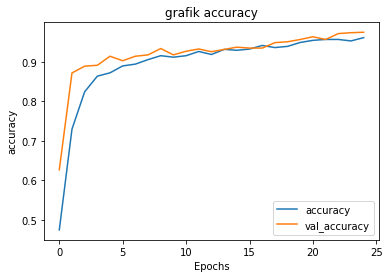

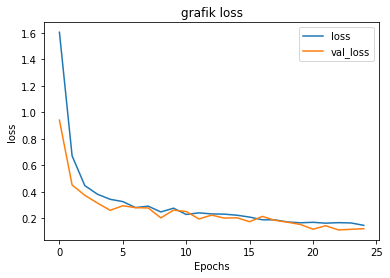

In [ ]:
import matplotlib.pyplot as plt
def grafik_plot(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.title('grafik '+string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
grafik_plot(history, "accuracy")
grafik_plot(history, "loss")

In [ ]:
model.evaluate(validation_generator)

88/88 [==============================] - 6s 73ms/step - loss: 0.1244 - accuracy: 0.9725


[0.12436468154191971, 0.972540020942688]

### **8. Memprediksi Gambar**

Saving 7c2VZ3UGtDTLecjo.png to 7c2VZ3UGtDTLecjo.png
Scissors


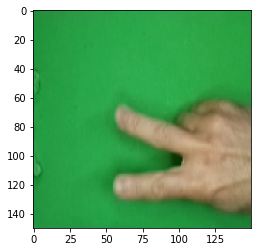

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded_files = files.upload()
 
for pic in uploaded_files.keys():
  path = pic
  img = image.load_img(path, target_size=(width,height))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images)
  # print(classes)
  class_index = np.argmax(classes)
  # print(class_index)
  if class_index==0:
   print('Paper')
  elif class_index==1:
   print('Rock')
  elif class_index==2:
   print('Scissors')